# Distribution generation

In [33]:
import sys
import numpy as np
from matplotlib import pyplot as plt
import proplot as plot

sys.path.append('/Users/46h/Research/code/accphys')
from tools import (
    plotting as myplt, 
    envelope_analysis as ea,
)

plot.rc['figure.facecolor'] = 'white'

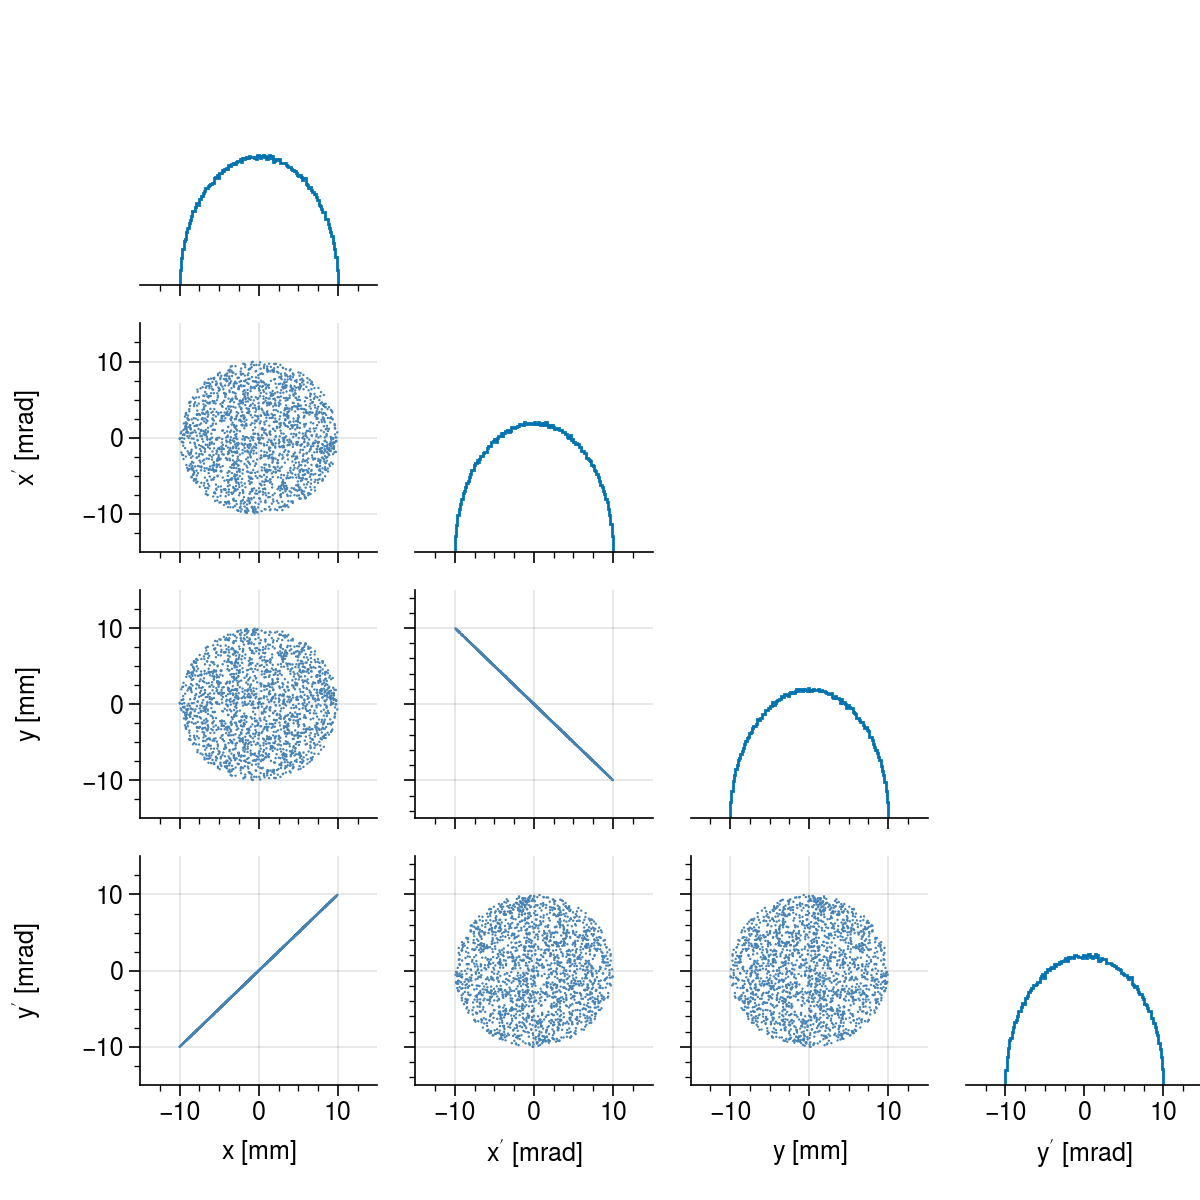

In [103]:
nparts = int(1e6)
env = ea.Envelope(eps=50)

X = env.generate_dist(nparts)
axes = myplt.corner(X, hist_height=0.6);
plt.savefig('danilov_dist.png', facecolor='w', dpi=500)